# Analyze IMU Data

What Are Some Basic Summary Statisitcs of the IMU Data?

## Dependencies

In [2]:
import os, stat
import numpy as np
import utils.pupil_filemethods as fm
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation

## Parameters

In [209]:
# dd='hmet_data_2'
# subject = 'ad'
# date = '2021_06_19'
# trial = '014_a'
# it=0
# task='sandwich'

# dd='hmet_data_2'
# subject = 'ad'
# date = '2021_06_19'
# trial = '012_d'
# it=0
# task='patio_walk'

dd='hmet_data_2'
subject = 'sm'
date = '2021_06_27'
trial = '042'
it=0
task='indoor_walk'

# dd='hmet_data'
# subject = 'dd'
# date = '2021_06_29'
# trial = '034'
# it=0
# task='indoor_walk'

data_dir = f'/{dd}/{subject}/{date}'
#data_dir = os.path.join(base_dir, 'raw')
output_dir = os.path.join(f'/hmet_analysis/{subject}/{task}/{it}/imu')

#trial = '2020_12_24/016' #vasha sandwich
#trial = '2020_12_24/016' #vasha sandwich
#trial = '2020_12_22/005' #vasha computer
#trial = '2020_12_24/007' #dar sandwich

## Readin & Convert Traces

In [210]:
def pldata_2_dict(pldata):
    dic_rep = [dict(d) for d in pldata]
    out_dic = defaultdict(list)
    #print(dic_rep)
    for item in dic_rep:
        for key, value in item.items():
            out_dic[key].append(value)
    out_dic = dict(out_dic)
    #del out_dic['topic']
    return(out_dic)


In [211]:
os.path.join(data_dir,trial),f'odometry{head_imu_ext}'

('/hmet_data_2/sm/2021_06_27/042', 'odometry_head')

In [212]:
import imp
imp.reload(fm)
head_imu_ext = '_head'
body_imu_ext = '_body'
#read in pldatafile
head_imu_data, head_imu_timestamps, _ = fm.load_pldata_file(os.path.join(data_dir,trial),f'odometry{head_imu_ext}')
body_imu_data, body_imu_timestamps, _ = fm.load_pldata_file(os.path.join(data_dir,trial),f'odometry{body_imu_ext}')
#convert to well formated dict
head_imu_data = pldata_2_dict(head_imu_data)
body_imu_data = pldata_2_dict(body_imu_data)

In [213]:
print(head_imu_data.keys())

dict_keys(['topic', 'timestamp', 'rs_timestamp', 'tracker_confidence', 'position', 'orientation', 'linear_velocity', 'angular_velocity'])


## Position

In [214]:
np.array(head_imu_data['position']).T.shape

(3, 24293)

Text(0.5, 1.0, 'Head Positions')

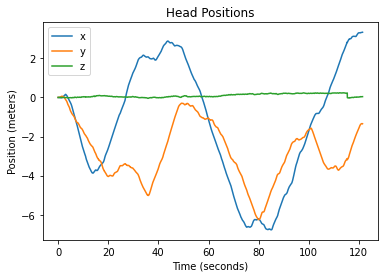

In [215]:
head_tstamps = np.array(head_imu_data['timestamp'])
head_positions_xyz = np.array(head_imu_data['position']).T
idx = [0,2,1]
head_positions_xyz=head_positions_xyz[idx,:]

head_tstamps = head_tstamps - head_tstamps[0]
head_positions_xyz = head_positions_xyz - head_positions_xyz[:,0,None]

plt.plot(head_tstamps, head_positions_xyz[0], label=('x'))
plt.plot(head_tstamps, head_positions_xyz[1], label=('y'))
plt.plot(head_tstamps, head_positions_xyz[2], label=('z'))
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Position (meters)')
plt.title("Head Positions")

Text(0.5, 0.92, 'Head Trajectory')

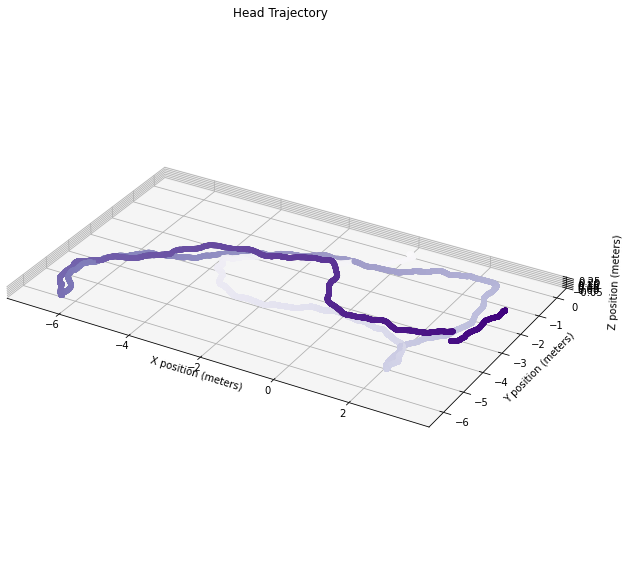

In [216]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_box_aspect((np.ptp(head_positions_xyz[0]), np.ptp(head_positions_xyz[1]), np.ptp(head_positions_xyz[2])))# Data for three-dimensional scattered points
ax.scatter3D(*head_positions_xyz, c=head_tstamps, cmap='Purples');
ax.set_xlabel('X position (meters)')
ax.set_ylabel('Y position (meters)')
ax.set_zlabel('Z position (meters)')
plt.title('Head Trajectory')

Text(0.5, 0.92, 'Head Trajectory: first 200 timestamps')

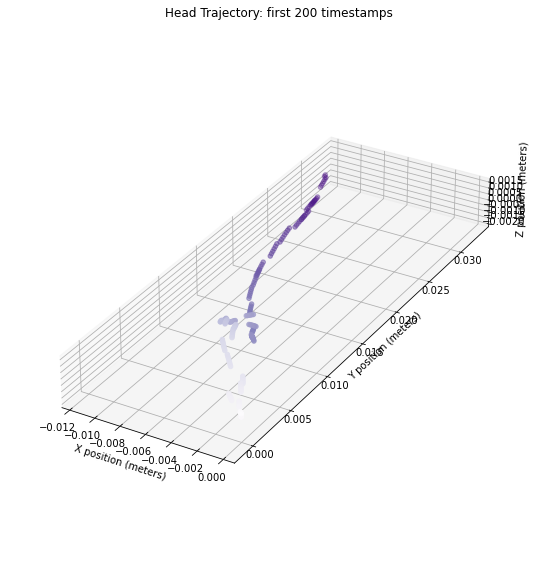

In [225]:
subsection = head_positions_xyz[:,:200]
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_box_aspect((np.ptp(subsection[0]), np.ptp(subsection[1]), np.ptp(subsection[2])))# Data for three-dimensional scattered points
ax.scatter3D(*subsection, c=np.arange(len(subsection[0])), cmap='Purples');
ax.set_xlabel('X position (meters)')
ax.set_ylabel('Y position (meters)')
ax.set_zlabel('Z position (meters)')
plt.title('Head Trajectory: first 200 timestamps')

Text(0.5, 1.0, 'Body Positions')

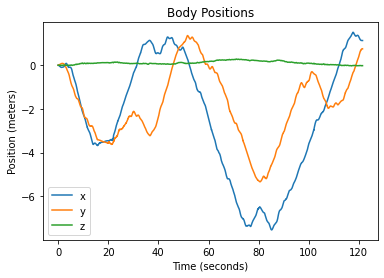

In [217]:
body_tstamps = np.array(body_imu_data['timestamp'])
body_positions_xyz = np.array(body_imu_data['position']).T
idx = [0,2,1]
body_positions_xyz=body_positions_xyz[idx,:]*np.expand_dims(np.array([-1,-1,1]),-1) #convert to head coordinates

body_tstamps = body_tstamps - body_tstamps[0]
body_positions_xyz = body_positions_xyz - body_positions_xyz[:,0,None]

plt.plot(body_tstamps, body_positions_xyz[0], label=('x'))
plt.plot(body_tstamps, body_positions_xyz[1], label=('y'))
plt.plot(body_tstamps, body_positions_xyz[2], label=('z'))
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Position (meters)')
plt.title("Body Positions")

Text(0.5, 0.92, 'Body Trajectory')

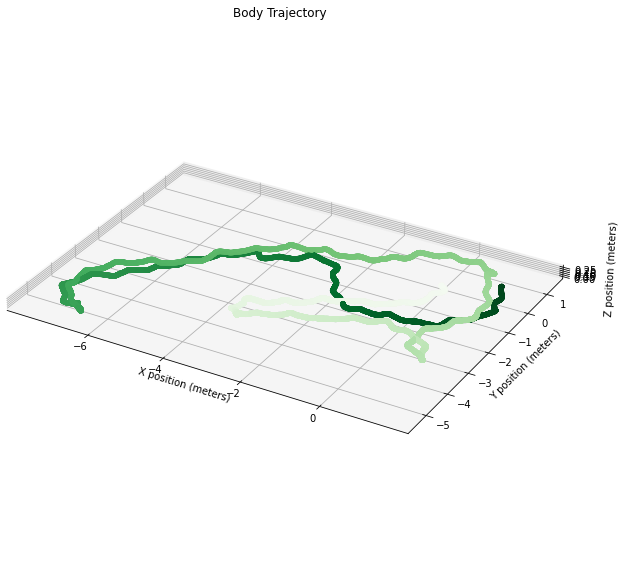

In [335]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_box_aspect((np.ptp(body_positions_xyz[0]), np.ptp(body_positions_xyz[1]), np.ptp(body_positions_xyz[2])))# Data for three-dimensional scattered points
ax.scatter3D(*body_positions_xyz, c=body_tstamps, cmap='Greens');
ax.set_xlabel('X position (meters)')
ax.set_ylabel('Y position (meters)')
ax.set_zlabel('Z position (meters)')
plt.title('Body Trajectory')

Text(0.5, 0.92, 'Body Trajectory: first 200 timestamps')

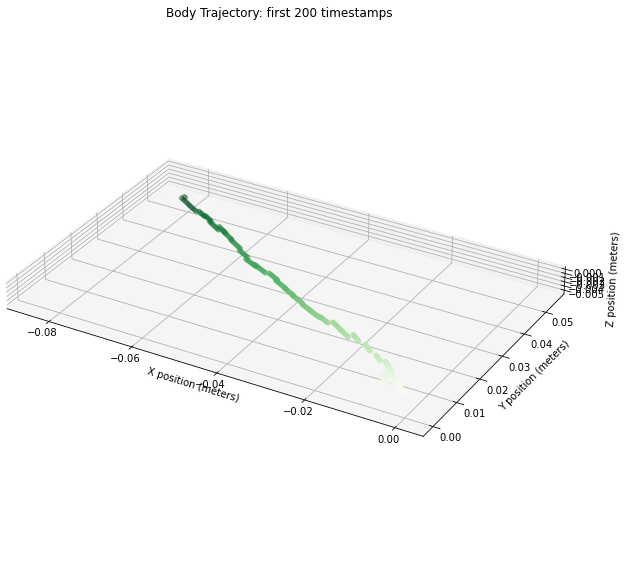

In [239]:
subsection = body_positions_xyz[:,:200]
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_box_aspect((np.ptp(subsection[0]), np.ptp(subsection[1]), np.ptp(subsection[2])))# Data for three-dimensional scattered points
ax.scatter3D(*subsection, c=np.arange(len(subsection[0])), cmap='Greens');
ax.set_xlabel('X position (meters)')
ax.set_ylabel('Y position (meters)')
ax.set_zlabel('Z position (meters)')
plt.title('Body Trajectory: first 200 timestamps')

## Orientation

Text(0.5, 1.0, 'Body Orientations')

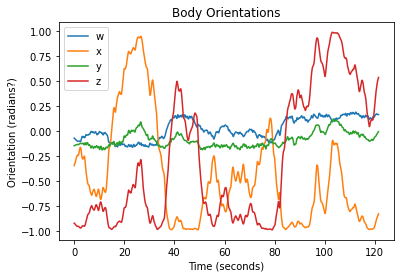

In [268]:
body_orientations_xyz = np.array(body_imu_data['orientation']).T
#idx = [0,2,1,3]
#body_orientations_xyz=body_orientations_xyz[idx,:]
#body_orientations_xyz = body_orientations_xyz - body_orientations_xyz[:,0,None]

plt.plot(body_tstamps, body_orientations_xyz[0], label=('w'))
plt.plot(body_tstamps, body_orientations_xyz[1], label=('x'))
plt.plot(body_tstamps, body_orientations_xyz[2], label=('y'))
plt.plot(body_tstamps, body_orientations_xyz[3], label=('z'))

plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Orientation (radians?)')
plt.title("Body Orientations")

Text(0.5, 1.0, 'Head Orientations')

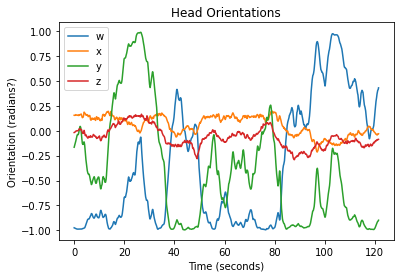

In [264]:
head_orientations_xyz = np.array(head_imu_data['orientation']).T
#idx = [0,2,1,3]
#head_orientations_xyz=head_orientations_xyz[idx,:]
#head_orientations_xyz = head_orientations_xyz - head_orientations_xyz[:,0,None]
#head_orientations_xyz = head_orientations_xyz*np.expand_dims(np.array([-1,1,1,1]),-1)

plt.plot(head_tstamps, head_orientations_xyz[0], label=('w'))
plt.plot(head_tstamps, head_orientations_xyz[1], label=('x'))
plt.plot(head_tstamps, head_orientations_xyz[2], label=('y'))
plt.plot(head_tstamps, head_orientations_xyz[3], label=('z'))
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Orientation (radians?)')
plt.title("Head Orientations")

# Overlay Trajectory Orientation

In [373]:
nsamples = 100
#convert to rotation matrix
rot = [Rotation.from_quat([*h]) for h in body_orientations_xyz.T]
rot_euler = np.array([r.as_euler('xyz', degrees=True) for r in rot]).T
idx = [0,2,1]
rot_euler=rot_euler[idx,:] #* np.expand_dims(np.array([-1,-1,1]),-1) #convert to head coordinates
rot_euler = rot_euler - rot_euler[:,0,None]

#index and sample positions and orientations
idx_samples = np.linspace(0,len(body_tstamps),nsamples, dtype=int,endpoint=False)
rot_samples = rot_euler[:,idx_samples]
pos_samples = body_positions_xyz[:,idx_samples]
samples = np.vstack((pos_samples,rot_samples))

Text(0.5, 0.92, 'Body Trajectory & Orientations')

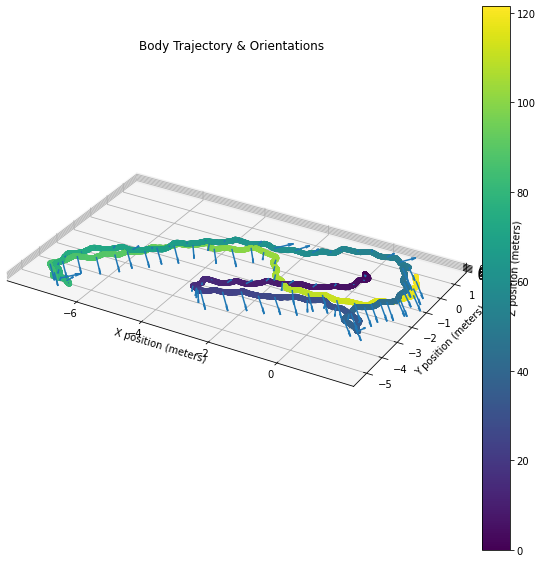

In [374]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_box_aspect((np.ptp(body_positions_xyz[0]), np.ptp(body_positions_xyz[1]), np.ptp(body_positions_xyz[2])))# Data for three-dimensional scattered points
p = ax.scatter3D(*body_positions_xyz, c=body_tstamps, cmap='viridis');

ax.quiver(*samples,length=0.003)

ax.set_box_aspect([np.ptp(i) for i in head_positions_xyz])  # equal aspect ratio
plt.colorbar(p)

ax.set_xlabel('X position (meters)')
ax.set_ylabel('Y position (meters)')
ax.set_zlabel('Z position (meters)')
plt.title('Body Trajectory & Orientations')

In [354]:
nsamples = 100
#convert to rotation matrix
rot = [Rotation.from_quat([*h]) for h in head_orientations_xyz.T]
rot_euler = np.array([r.as_euler('xyz', degrees=True) for r in rot]).T
idx = [0,2,1]
rot_euler=rot_euler[idx,:]#index and sample positions and orientations
idx_samples = np.linspace(0,len(head_tstamps),nsamples, dtype=int,endpoint=False)
rot_samples = rot_euler[:,idx_samples]
pos_samples = head_positions_xyz[:,idx_samples]
samples = np.vstack((pos_samples,rot_samples))

Text(0.5, 0.92, 'Head Trajectory & Orientations')

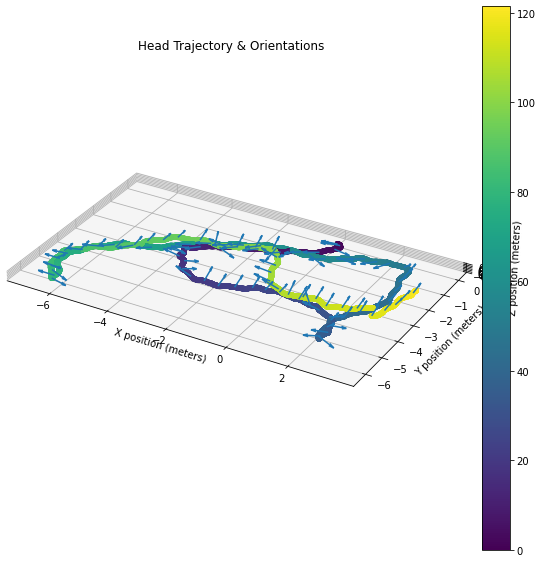

In [370]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_box_aspect((np.ptp(head_positions_xyz[0]), np.ptp(head_positions_xyz[1]), np.ptp(head_positions_xyz[2])))# Data for three-dimensional scattered points
p = ax.scatter3D(*head_positions_xyz, c=head_tstamps, cmap='viridis');
ax.quiver(*samples,length=0.003)

ax.set_box_aspect([np.ptp(i) for i in head_positions_xyz])  # equal aspect ratio
plt.colorbar(p)

ax.set_xlabel('X position (meters)')
ax.set_ylabel('Y position (meters)')
ax.set_zlabel('Z position (meters)')
plt.title('Head Trajectory & Orientations')

## Linear Velocity

Text(0.5, 1.0, 'Head Linear Velocities')

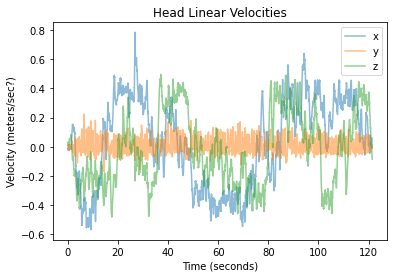

In [375]:
head_linvel = np.array(head_imu_data['linear_velocity']).T
#head_linvel = head_linvel - head_linvel[:,0,None]

plt.plot(head_tstamps, head_linvel[0], label=('x'),alpha=0.5)
plt.plot(head_tstamps, head_linvel[1], label=('y'),alpha=0.5)
plt.plot(head_tstamps, head_linvel[2], label=('z'),alpha=0.5)
#plt.plot(body_tstamps, body_linvel[0], label=('body'),alpha=0.5)

plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (meters/sec?)')
plt.title("Head Linear Velocities")

Text(0.5, 1.0, 'Body Linear Velocities')

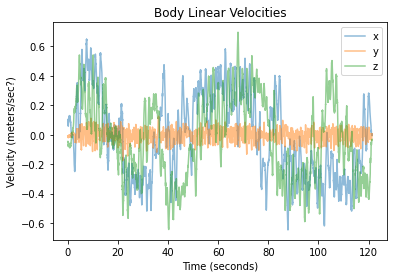

In [376]:
body_linvel = np.array(body_imu_data['linear_velocity']).T
#body_linvel = body_linvel - body_linvel[:,0,None]

plt.plot(body_tstamps, body_linvel[0], label=('x'),alpha=0.5)
plt.plot(body_tstamps, body_linvel[1], label=('y'),alpha=0.5)
plt.plot(body_tstamps, body_linvel[2], label=('z'),alpha=0.5)

plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (meters/sec?)')
plt.title("Body Linear Velocities")

Text(0.5, 1.0, 'Linear Velocity Distributions')

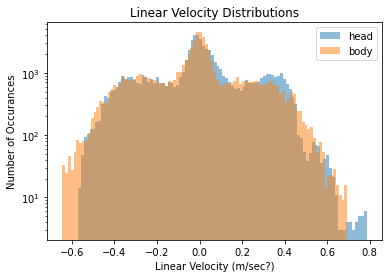

In [377]:
plt.hist(head_linvel.flatten(),alpha=0.5, label='head',bins=100)
plt.hist(body_linvel.flatten(),alpha=0.5, label='body', bins=100)
plt.semilogy()
plt.legend()
plt.xlabel('Linear Velocity (m/sec?)')
plt.ylabel('Number of Occurances')
plt.title('Linear Velocity Distributions')

## Angular Velocity

Text(0.5, 1.0, 'Head Angular Velocities')

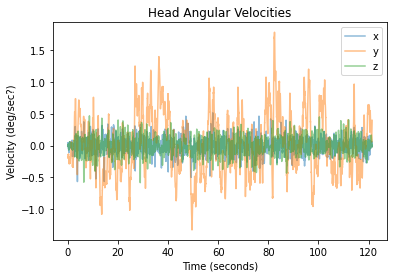

In [378]:
head_angvel_xyz = np.array(head_imu_data['angular_velocity']).T
#head_orientations_xyz = head_orientations_xyz - head_orientations_xyz[:,0,None]

plt.plot(head_tstamps, head_angvel_xyz[0], label=('x'),alpha=0.5)
plt.plot(head_tstamps, head_angvel_xyz[1], label=('y'),alpha=0.5)
plt.plot(head_tstamps, head_angvel_xyz[2], label=('z'),alpha=0.5)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (deg/sec?)')
plt.title("Head Angular Velocities")

Text(0.5, 1.0, 'Body Angular Velocities')

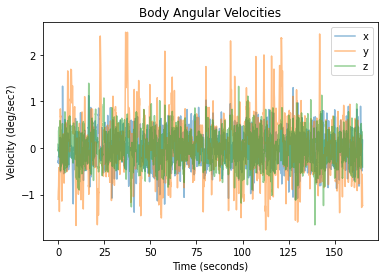

In [141]:
body_angvel_xyz = np.array(body_imu_data['angular_velocity']).T
#body_angvel_xyz = body_angvel_xyz - body_angvel_xyz[:,0,None]

plt.plot(body_tstamps, body_angvel_xyz[0], label=('x'),alpha=0.5)
plt.plot(body_tstamps, body_angvel_xyz[1], label=('y'),alpha=0.5)
plt.plot(body_tstamps, body_angvel_xyz[2], label=('z'),alpha=0.5)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (deg/sec?)')
plt.title("Body Angular Velocities")

Text(0.5, 1.0, 'Angular Velocity Distributions')

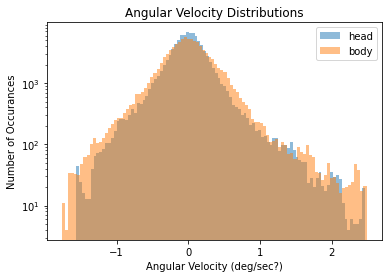

In [142]:
plt.hist(head_angvel_xyz.flatten(),alpha=0.5, label='head',bins=100)
plt.hist(body_angvel_xyz.flatten(),alpha=0.5, label='body', bins=100)
plt.semilogy()
plt.legend()
plt.xlabel('Angular Velocity (deg/sec?)')
plt.ylabel('Number of Occurances')
plt.title('Angular Velocity Distributions')

## Accelerations

In [ ]:
plt.hist(head_angvel_xyz.flatten(),alpha=0.5, label='head',bins=100)
plt.hist(body_angvel_xyz.flatten(),alpha=0.5, label='body', bins=100)
plt.semilogy()
plt.legend()
plt.xlabel('Angular Velocity (deg/sec?)')
plt.ylabel('Number of Occurances')
plt.title('Angular Velocity Distributions')